In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

### Problem 1. Inverse Transform Sampling

In [1]:
def inverse_transform(inverse_F):
    u = np.random.uniform(0, 1, 10000)
    x = inverse_F(u)

    return x

#### (a) Logistic Distribution

$F^{-1}(x)=-ln(1/y-1)$

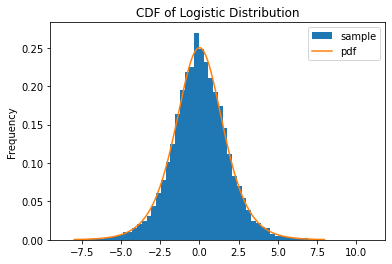

In [4]:
def logistic_cdf(x):
    return 1 / (1 + np.exp(-x))

def logistic_inverse_cdf(x):
    return -np.log((1 / x) - 1)

def logistic_pdf(x):
    return np.exp(-x) / ((1 + np.exp(-x))**2)

def plot(x, pdf):
    plt.hist(x, bins=64, density=True, label="sample")
    plt.plot(np.linspace(-8,8,1000), pdf(np.linspace(-8,8,1000)), label="pdf")
    plt.ylabel('Frequency')
    plt.title('CDF of Logistic Distribution')
    plt.legend()

x = inverse_transform(logistic_inverse_cdf)
plot(x, logistic_pdf)

#### (b) Rayleigh Distribution

$F^{-1}(x) = \sqrt{-2ln(1-x)}$

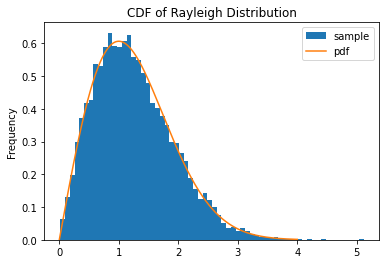

In [5]:
def rayleigh_cdf(x):
    return 1 - np.exp(-1/2 * np.exp(-x**2))

def rayleigh_inverse_cdf(x):
    return np.sqrt(-2 * np.log(1-x))

def rayleigh_pdf(x):
    return x * np.exp(-1/2 * (x**2))

def plot(x, pdf):
    plt.hist(x, bins=64, density=True, label="sample")
    plt.plot(np.linspace(0,4,1000), pdf(np.linspace(0,4,1000)), label="pdf")
    plt.ylabel('Frequency')
    plt.title('CDF of Rayleigh Distribution')
    plt.legend()

x = inverse_transform(rayleigh_inverse_cdf)
plot(x, rayleigh_pdf)

#### (c) Exponential Distribution

$F^{-1}(x) = -ln(1-x)$

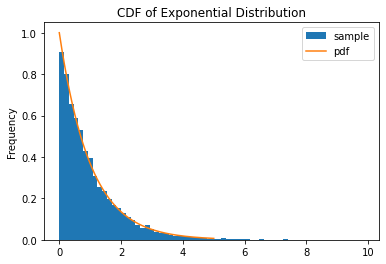

In [6]:
def exponential_cdf(x):
    return 1 - np.exp(-x)

def exponential_inverse_cdf(x):
    return -np.log(1-x)

def exponential_pdf(x):
    return np.exp(-x)

def plot(x, pdf):
    plt.hist(x, bins=64, density=True, label="sample")
    plt.plot(np.linspace(0,5,1000), pdf(np.linspace(0,5,1000)), label="pdf")
    plt.ylabel('Frequency')
    plt.title('CDF of Exponential Distribution')
    plt.legend()

x = inverse_transform(exponential_inverse_cdf)
plot(x, exponential_pdf)

### Problem 2. Samples Discrete Distributions

#### (a) Bern(0.5)

In [84]:
N, p = 10000, 0.5
u = np.random.uniform(0, 1, N)
bern = (u > p).astype(int)

print('mean = ', round(bern.mean(),2))
print('variance = ',round(bern.var(),3))

mean =  0.51
variance =  0.25


#### (b) Bin(20, 0.5)

In [85]:
N, n, p = 10000, 20, 0.5
u = np.random.uniform(0, 1, [20, N])
bin = (u > p).astype(int).sum(axis=0)

print('mean = ', round(bin.mean(),2))
print('variance = ',round(bin.var(),3))

mean =  9.99
variance =  4.947


#### (c) Geom(0.5)

In [86]:
N, p = 100000, 0.5
geom = np.zeros(N)
for i in range(N):
    while np.random.random() < p:
        geom[i] += 1

print('mean = ', round(geom.mean(),2))
print('variance = ',round(geom.var(),3))

mean =  1.0
variance =  1.996


#### (d) Nbin(10, 0.5)

In [88]:
N, n, p = 10000, 10, 0.5
Ngeom = np.zeros(N)
for i in range(N):
    num_success = 0
    while num_success < n:
        # false
        if np.random.random() < p:
            Ngeom[i] += 1
        # success
        else:
            num_success += 1

print('mean = ', round(Ngeom.mean(),2))
print('variance = ',round(Ngeom.var(),3))

mean =  10.06
variance =  20.389


### Problem 3

1. (a) Estimate $E(N)$
2. (b) Estimate $Var(N)$

In [126]:
num_iter = 5000
N_rv = np.zeros(num_iter)
for i in range(num_iter):
    product = np.random.uniform(0, 1)
    n = 0
    while product >= np.exp(-1):
        n += 1
        product *= np.random.uniform(0, 1)
    N_rv[i] = n
    
print('mean = ', round(N_rv.mean(),2))
print('variance = ',round(N_rv.var(),3))

mean =  1.01
variance =  1.034


3. (c) Estimate $P(N=i)$, for $i=0,1,2,3$

P(N = 0) = 0.367
P(N = 1) = 0.364
P(N = 2) = 0.185
P(N = 3) = 0.064
Counter({0.0: 0.3674, 1.0: 0.3636, 2.0: 0.185, 3.0: 0.0638, 4.0: 0.016, 5.0: 0.003, 6.0: 0.001, 8.0: 0.0002})


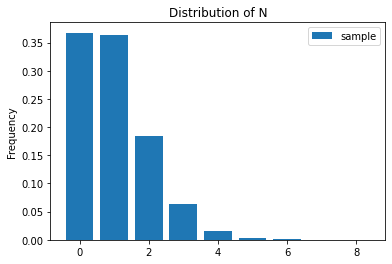

In [135]:
from collections import Counter
count = Counter(N_rv)
distribution = count.copy()
for key, value in count.items():
    distribution[key] = value / num_iter

for i in range(4):
    print("P(N = {}) = {}".format(i, round(distribution[i], 3)))
print(distribution)

plt.bar(distribution.keys(), distribution.values(), label="sample")
plt.ylabel('Frequency')
plt.title('Distribution of N')
plt.legend()


4. (d) Exact Distribution of N: $N \sim Pois(1)$

### Problem 4. Monty Hall Problem
#### (a) Never-switching:

In [157]:
num_epoch = 10000
num_of_win = 0

for i in range(num_epoch):
    
    # three door in total
    choice = random.randint(1, 3)

    # suppose the car is behind the 1th door 
    # then if the contestant choose the 1th door, then he win
    
    if choice == 1:
        num_of_win += 1

print("The probabililty of winning (never switching) is: {}".format(num_of_win / num_epoch))

The probabililty of winning (never switching) is: 0.335


#### Always switching:

In [158]:
num_epoch = 10000
num_of_win = 0

for i in range(num_epoch):
    
    # three door in total
    choice = random.randint(1, 3)

    # suppose the car is behind the 1th door 
    # then if the contestant choose the 2nd or 3rd door, then he win
    
    if choice == 2 or choice == 3:
        num_of_win += 1

print("The probabililty of winning (always switching) is: {}".format(num_of_win / num_epoch))

The probabililty of winning (always switching) is: 0.6662


Therefore, he should always switch the choice.

#### (b)
1. Select a door at random and stick with it throughout.

In [332]:
def Monty_Hall(num_doors):
    num_epoch = 1000
    num_of_win = np.zeros(3)
    strategy_list= [1, 2, 3]

    for strategy in strategy_list:       

        for i in range(num_epoch):

            door_index = np.arange(1, num_doors+1)     
            # suppose the car in the car_index door
            car_index = random.choice(door_index)  

            first_choice = random.choice(door_index)
            # doors that without car behind it
            door_available = np.delete(door_index, np.where(door_index == car_index))
            final_choice = 0 

            while len(door_index) >= 2:

                if strategy == 1:
                    # stick with it throughout
                    final_choice = first_choice
                    break
                
                if strategy == 2:
                    # switch doors at every opportunity at random
                    if len(door_index) == num_doors:
                        choice = first_choice
                    elif len(door_index) > 2 and len(door_index) < num_doors:
                        choice = random.choice(np.delete(door_index, np.where(door_index == choice)))
                    else:
                        final_choice = random.choice(np.delete(door_index, np.where(door_index == choice)))
                        break
                
                if strategy == 3:

                    # stick with your first choice until only two doors remain, 
                    # and then switch

                    if len(door_index) > 2:
                        choice = first_choice
                    else:
                        door_available = np.delete(door_index, np.where(door_index == choice))
                        final_choice = door_available[0]
                        break
                
                eliminate_door = random.choice(np.delete(door_available, np.where(door_available == choice)))
                door_available = np.delete(door_available, np.where(door_available == eliminate_door))
                door_index = np.delete(door_index, np.where(door_index == eliminate_door))

            if final_choice == car_index:
                num_of_win[strategy-1] += 1

    print("The probabililty of winning (strategy 1) of {} doors is: {}".format(n, num_of_win[0] / num_epoch))
    print("The probabililty of winning (strategy 2) of {} doors is: {}".format(n, num_of_win[1] / num_epoch))
    print("The probabililty of winning (strategy 3) of {} doors is: {}".format(n, num_of_win[2] / num_epoch))


In [334]:
Monty_Hall(4)
print()
Monty_Hall(100)

The probabililty of winning (strategy 1) of 4 doors is: 0.244
The probabililty of winning (strategy 2) of 4 doors is: 0.635
The probabililty of winning (strategy 3) of 4 doors is: 0.753

The probabililty of winning (strategy 1) of 4 doors is: 0.008
The probabililty of winning (strategy 2) of 4 doors is: 0.638
The probabililty of winning (strategy 3) of 4 doors is: 0.991


### Problem 5. Percolation

In [11]:
class WeightedQuickUnionUF:
    def __init__(self,n):
        self.count = n
        self.size = [1 for i in range(n)]
        self.parent = [i for i in range(n)]
    def connected(self,p,q):
        self.validate(p)
        self.validate(q)
        return self.find(p)==self.find(q)
    def find(self,p):
        self.validate(p)
        while p != self.parent[p]:
            p=self.parent[p]
        return p
    def validate(self,p):
        n = len(self.size)
        if (p<0 or p>=n):
            raise Exception('Out of range!')
    def union(self,p,q):
        self.validate(p)
        self.validate(q)
        rootP = self.find(p)
        rootQ = self.find(q)
        if rootP ==  rootQ: 
            return
        if self.size[rootP] < self.size[rootQ]:
            self.parent[rootP] =rootQ
            self.size[rootQ] = self.size[rootQ] +self.size[rootP]
        else:
            self.parent[rootQ] =rootP
            self.size[rootP] = self.size[rootP]+self.size[rootQ]
        
class Percolation:
    def __init__(self, N):
        self.Array = [[0 for i in range(N)] for j in range(N)]
        self.size = N
        self.UF = WeightedQuickUnionUF(N*N+2)

#open site (row i, column j) if it is not open already
    def Open(self,i,j):
        if self.Array[i][j]==1:
            #print('('+str(i)+','+str(j)+') has already been open!')
            return
        else:
            self.Array[i][j]=1
            #print('('+str(i)+','+str(j)+') is open now!')
            if i==0:
                self.UF.union(0,i*self.size+j+1)
            if i==self.size-1:
                self.UF.union(self.size*self.size+1,i*self.size+j+1)
            if i!=0:
                if self.isOpen(i-1,j):
                    self.UF.union(i*self.size+j+1,(i-1)*self.size+j+1)
            if i!=self.size-1:
                if self.isOpen(i+1,j):
                    self.UF.union(i*self.size+j+1,(i+1)*self.size+j+1)
            if j!=0:
                if self.isOpen(i,j-1):
                    self.UF.union(i*self.size+j+1,i*self.size+j)
            if j!=self.size-1:
                if self.isOpen(i,j+1):
                    self.UF.union(i*self.size+j+1,i*self.size+j+2)

    #is site (row i, column j) open?
    def isOpen(self,i,j):
        return self.Array[i][j]==1
  
    #is site (row i, column j) full?
    def isFull(self,i,j):
        return self.UF.connected(0,i*self.size+j+1)
    
    #does the system percolate?
    def percolates(self):
        return self.UF.connected(0,self.size*self.size+1)
    
class PercolationStats:
    def __init__(self,N,T):
        self.threshold = []
        self.times = T
        for k in range(T):
            experiment = Percolation(N)
            count = 0
            while (not experiment.percolates()):
                block_list = []
                for i in range(N):
                    for j in range(N):
                        if not experiment.isOpen(i, j):
                            block_list.append(i*N+j)
                to_open = random.choice(block_list)
                to_open_j = int(to_open % N)
                to_open_i = int((to_open-to_open_j)/N) 
                experiment.Open(to_open_i,to_open_j)
                count = count+1
            self.threshold.append(count/(N*N))
        self.Array = np.array(self.threshold)
    def mean(self):
        return np.mean(self.Array)
    def stddev(self):
        return np.std(self.Array,ddof=1)
    def confidenceLow(self):
        return self.mean()-1.96*self.stddev()/(self.times**0.5)
    def confidenceHigh(self):
        return self.mean()+1.96*self.stddev()/(self.times**0.5)

if __name__ == '__main__':
    size = [20, 50, 100]
    for n in size:
        test = PercolationStats(20,10)
        print("Estimation of the percolation threshold of {}-by-{} grid is: {}".format(n,n,round(test.mean(),3)))


Estimation of the percolation threshold of 20-by-20 grid is: 0.591
Estimation of the percolation threshold of 50-by-50 grid is: 0.6
Estimation of the percolation threshold of 100-by-100 grid is: 0.613
